<a href="https://colab.research.google.com/github/supertime1/Floyer_Analysis/blob/main/Cosinuss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Set up dependency

In [1]:
import sys
sys.path.append('C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss')

In [2]:
from data_container import config, DataFile
from data_container.api_db_sync import DBSync
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2021-02-19 11:42:46 - DEBUG -       dc_config:  45 - DcConfig initialized


#2.Connect to Cosinuss Database

In [61]:
def configure_api(db_name, username, update_local=False):
    """
    Configure api as the data handler
    """
    try:
        config.init(db_name=db_name)
        api = DBSync(username=username,
                    server = 'https://telecovid.earconnect.de')
    except:
        print('Configure API failed')
        return
    # password: teeshau7aiMonoh9ee
    if update_local:
    # download data from the server
        api.pull_all_dfs(prj_hash_id='M9KH')
    
    df_list_local = api.df_list(prj_hash_id='M9KH')
    print('There are', len(df_list_local), 'files in local database')
    return api


api = configure_api('sonova_analysis', 'sonova.fremont.api')

2021-02-19 14:09:57 - ERROR -       dc_config:  52 - data_container.config.init() can only be called once
2021-02-19 14:09:58 -  INFO -       api_login: 241 - login: sonova.fremont.api @ https://telecovid.earconnect.de
2021-02-19 14:09:59 -  INFO -       api_login: 253 - successful login, it expires 2021-02-20 02:10:00 expiring in 720.0 min


There are 163 files in local database


In [52]:
def generate_table():
    """
    Convert local database into a Pandas dataframe, for ease of data analysis
    """
    table = api.overview_dfs()
    overview_df = pd.DataFrame(table[1:], columns=table[0])
    # change to lower case for the device name
    overview_df['device'] = overview_df['device'].str.lower()
    overview_df['device'].str.match(r'^polar') = 'polar'

,person,when,device,df id,duration,samples,cols
0,M9KH.C37E (MeBa),2020-12-01 12:21:03,garmin,8QEK89R9B4.QTDGP0,00:07:09,30,heart_rate
1,M9KH.C37E (MeBa),2020-12-01 13:15:37,polar_h7 (*3wz),003RN9.QZTDXZ,00:10:57,572,heart_rate
2,M9KH.C37E (MeBa),2020-12-01 13:20:57,cshell,8QEK89R9B4.QL6EGE,00:07:14,376.3 K,"ble_packet_counter, ble_sample_c..."
3,M9KH.C37E (MeBa),2020-12-01 13:20:57,biometric,8QEK89R9B4.DX19WU,00:07:14,371.4 K,"ble_packet_counter, ble_sample_c..."
4,M9KH.7614 (ThHo),2020-12-01 16:27:04,garmin,8QEK89R9B4.JTUVYB,00:23:41,1.4 K,heart_rate
...,...,...,...,...,...,...,...
158,M9KH.3WKY (FeKo),2021-02-10 15:29:14,polar_h7,1C2RATHBVH.1GU1TF,00:34:58,2.1 K,heart_rate
159,M9KH.WSBV (NiOr),2021-02-10 16:14:25,garmin,8QEK89R9B4.H3HPWQ,00:35:08,2.1 K,heart_rate
160,M9KH.WSBV (NiOr),2021-02-10 16:14:44,polar_h7,1C2RATHBVH.ZBY97Y,00:35:13,2.1 K,heart_rate
161,M9KH.WSBV (NiOr),2021-02-10 16:14:57,cshell,1C2RATHBVH.9592E8,00:35:01,1.7 M,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_..."


In [69]:
overview_df[overview_df['device'].str.match(r'^polar')].loc[:,'device'] = 'polar'

C:\Users\57lzhang.US04WW4008\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [71]:
overview_df['deivce'] = np.where(overview_df['device'].str.match(r'^polar'), 'polar')

ValueError: ignored

In [44]:
overview_df[overview_df['device'].str.match(r'^cshell')]

,person,when,device,df id,duration,samples,cols
17,M9KH.P0J0 (AlLo),2020-12-14 10:48:20,cshell,1C2RATHBVH.EZ3VYP,00:00:27,14.9 K,"ppg_ir, ppg_ambient, acc_x, acc_..."
46,M9KH.CRC2 (TiAd),2020-12-15 17:35:12,cshell,1C2RATHBVH.JN8SEY,00:00:40,22.5 K,"ppg_ir, ppg_ambient, acc_x, acc_..."
54,M9KH.BZYG (RaHe),2020-12-16 13:25:41,cshell,1C2RATHBVH.A32XU1,00:02:49,99.8 K,"ppg_ir, ppg_ambient, acc_x, acc_..."
60,M9KH.WSBV (NiOr),2020-12-16 14:58:40,cshell,1C2RATHBVH.9T4YM8,00:00:31,16.8 K,"ppg_ir, ppg_ambient, acc_x, acc_..."
62,M9KH.WSBV (NiOr),2020-12-16 15:02:03,cshell,1C2RATHBVH.1ZBKZC,00:39:00,1.4 M,"ppg_ir, ppg_ambient, acc_x, acc_..."
72,M9KH.SWAM (AxHe),2020-12-17 14:32:43,cshell,1C2RATHBVH.VTWSC6,00:01:15,42.7 K,"ppg_ir, ppg_ambient, acc_x, acc_..."
74,M9KH.SWAM (AxHe),2020-12-17 15:01:29,cshell,1C2RATHBVH.DCFGW2,00:12:02,432.4 K,"ppg_ir, ppg_ambient, acc_x, acc_..."
76,M9KH.7614 (ThHo),2020-12-18 08:04:51,cshell,1C2RATHBVH.P73CZ7,00:01:18,60.8 K,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_..."
82,M9KH.7614 (ThHo),2020-12-18 10:51:01,cshell,1C2RATHBVH.LS7TG4,00:39:30,1.9 M,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_..."
87,M9KH.ME9A (LeLo),2020-12-18 14:35:50,cshell,1C2RATHBVH.K5Z6WK,00:00:31,22.6 K,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_..."


In [30]:
overview_df[overview_df['device'] == 'polar_h7']

,person,when,device,df id,duration,samples,cols
15,M9KH.P0J0 (AlLo),2020-12-14 10:22:20,polar_h7,1C2RATHBVH.LLLB28,00:06:54,414,heart_rate
19,M9KH.P0J0 (AlLo),2020-12-14 10:53:11,polar_h7,1C2RATHBVH.VZRX51,00:41:41,2.5 K,heart_rate
23,M9KH.03GS (DaBi),2020-12-14 15:37:10,polar_h7,1C2RATHBVH.ZC3B7G,00:36:15,2.2 K,heart_rate
28,M9KH.3WKY (FeKo),2020-12-15 08:45:47,polar_h7,1C2RATHBVH.Q4NZ37,00:36:00,2.2 K,heart_rate
30,M9KH.CJD6 (BiSe),2020-12-15 11:51:06,polar_h7,1C2RATHBVH.TPT9GX,00:00:30,29,heart_rate
32,M9KH.CJD6 (BiSe),2020-12-15 11:54:33,polar_h7,1C2RATHBVH.YZWHKG,00:37:12,2.2 K,heart_rate
36,M9KH.QZWW (ShMo),2020-12-15 14:12:33,polar_h7,1C2RATHBVH.2MQJDV,00:10:33,632,heart_rate
38,M9KH.QZWW (ShMo),2020-12-15 14:44:37,polar_h7,1C2RATHBVH.X0R9K1,00:29:06,1.7 K,heart_rate
42,M9KH.QDZ7 (KiMc),2020-12-15 15:32:08,polar_h7,1C2RATHBVH.GRCUUA,00:41:27,2.5 K,heart_rate
48,M9KH.CRC2 (TiAd),2020-12-15 17:39:08,polar_h7,1C2RATHBVH.T1FWFK,00:38:20,2.3 K,heart_rate


In [10]:
# download data if it is not in local database
#df_cshell = imp.pull_df('8QEK89R9B4.2NTSXK')

#import cShell data
df_cshell = DataFile.objects(_hash_id='8QEK89R9B4.2NTSXK').first()
cshell = imp.one3_hr_algo('v0', '8QEK89R9B4.2NTSXK')
cshell.keys()
cs_hr_x = np.asarray(cshell['heart_rate_t'])
cs_hr_y = cshell['heart_rate']
cd_q = cshell['quality']

In [15]:
#import polar data
df_ploar = imp.pull_df('003RN9.36G4ZN')

df_polar = DataFile.objects(_hash_id='003RN9.36G4ZN').first()
po_hr_x = df_polar.c.heart_rate.x
po_hr_y = df_polar.c.heart_rate.y
offset = (df_cshell.date_time_start - 
          df_polar.date_time_start).total_seconds() + 2098

2021-02-18 10:22:19 -  INFO -     api_db_sync: 429 - Data file 003RN9.36G4ZN completely downloaded + database_entries: Scope, Config, Projects (4), Receivers (3), Persons (27), Devices (4)User (6), 


In [45]:
new = np.asarray([round(i) for i in po_hr_x])

In [46]:
new

array([   5,    6,    7, ..., 5317, 5318, 5319])

In [47]:
cs_hr_x

array([   7,    8,    9, ..., 1605, 1606, 1607])

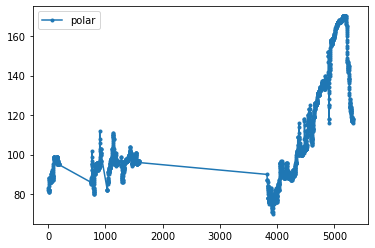

In [31]:
plt.plot(po_hr_x[100], po_hr_y, marker='.', label='polar')
#plt.plot(cs_hr_x+offset, cs_hr_y, marker='.', label='cshell')
plt.legend()
plt.show()

# New Section

In [ ]:
#convert time to seconds in integer
#fill
class PairedSample:
    
    def __init__(self, polar_hash_id, floyer_hash_id, hr_algo_version):
        self.polar_hash_id = polar_hash_id
        self.floyer_hash_id = floyer_hash_id
        self.df_polar = DataFile.objects(_hash_id=polar_hash_id).first()
        self.df_floyer = DataFile.objects(_hash_id=floyer_hash_id).first()
        self.hr_algo_version = hr_algo_version
    
    def process(self):
        # calculate floyer heart rate
        floyer = imp.one3_hr_algo(self.hr_algo_version, self.floyer_hash_id)
        floyer_hr_x = np.asarray(floyer['heart_rate_t'])
        floyer_hr_y = floyer['heart_rate']

        # get polar heart rate 
        po_hr_x = self.df_polar.c.heart_rate.x
        po_hr_y = self.df_polar.c.heart_rate.y

        # calculate offsets (i.e. floyer and polar maynot start recording at the
        # same time)
        offset = (df_cshell.date_time_start - 
                  df_polar.date_time_start).total_seconds() + 2098
        # make sure two devices start at the same time
        po_hr_x = po_hr_x[offset:]
        po_hr_y = po_hr_y[offset:]

        # create a new dataframe with three columns: time (s), p_hr, f_hr
        


        self.mape = self.mape() 
        self.icc = self.icc()
        self.da = self.da()

    def mape(self):
    
    def icc(self):
    
    def da(self):

    def line_plot(self):

    def ba_plot(self):

    